# Plotting Fitbit Data

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import calmap
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly
import plotly.graph_objs as go
import datetime as dt

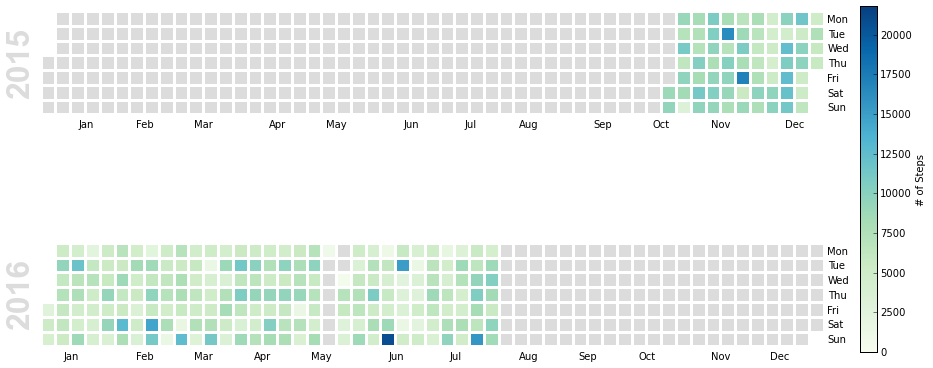

In [3]:
"""create a heatmap of daily total steps burned"""
allFiles = glob.glob("Data/Activities_Summary/*.csv") # create a list of all data files
fulldf = []
for file_ in allFiles: # for loop to merge data files
    df = pd.read_csv(str(file_), index_col=0)
    fulldf.append(df)
fulldf = pd.concat(fulldf)
fulldf.index=pd.to_datetime(fulldf.index) # use date as index
fulldf = fulldf[fulldf.steps != 0] # remove days without data
events = pd.Series(fulldf['steps'])
# create a heat map of steps walked per day
fig,ax=calmap.calendarplot(events, monthticks=True, cmap='GnBu', vmin=0, vmax=max(fulldf['steps'])+1000,
                    fillcolor='gainsboro', linecolor='white', linewidth=2,
                    fig_kws=dict(figsize=(12, 8)));
cax = fig.add_axes([1.0, 0.2, 0.02, 0.6])
norm1 = mpl.colors.Normalize(0,max(fulldf['steps'])+1000)
cb = mpl.colorbar.ColorbarBase(cax, cmap='GnBu', norm=norm1, spacing='proportional')
cb.set_label('# of Steps')

In [4]:
dayofweek = []

for day in fulldf.index: # create new column for day of week
    #datentime=dt.datetime.strptime(day, '%Y-%m-%d')
    #dateonly=datentime.date()
    dateonly=day.date()
    dayofweek.append(dateonly.isoweekday())

fulldf['dayofweek']=dayofweek
print fulldf.head()

            activeScore  activityCalories  caloriesBMR  caloriesOut  \
2015-10-24           -1              1319         1437         2528   
2015-10-25           -1              1449         1437         2601   
2015-10-26           -1              1074         1437         2278   
2015-10-27           -1               912         1437         2118   
2015-10-28           -1              1087         1437         2284   

            elevation  fairlyActiveMinutes  floors  lightlyActiveMinutes  \
2015-10-24        130                   13      13                   206   
2015-10-25         20                   25       2                   291   
2015-10-26        380                   20      38                   250   
2015-10-27        190                   13      19                   260   
2015-10-28        250                    7      25                   228   

            marginalCalories  restingHeartRate  sedentaryMinutes  steps  \
2015-10-24               836             

## Create Interactive Plots with Plotly

In [ ]:
"""enter your Plotly username and api_key"""
plotly.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')

In [5]:
"""show daily step distribution as an interactive histogram"""
trace1 = go.Histogram(
    x=fulldf['steps'],
    histnorm='count',
    name='control',
    autobinx=False,
    xbins=dict(
        start=500,
        end=max(fulldf['steps'])+1000,
        size=1000
    ),
    marker=dict(
        color='blue',
        line=dict(
            color='grey',
            width=0
        )
    ),
    opacity=0.75
)

data = [trace1]
layout = go.Layout(
    title='Distribution of Daily Step Count',
    xaxis=dict(
        title='Total Steps'
    ),
    yaxis=dict(
        title='# of Days'
    ),
    barmode='overlay',
    bargap=0.25,
    bargroupgap=0.3
)
fig = go.Figure(data=data, layout=layout)
plotly.plotly.iplot(fig)

In [6]:
"""create boxplots for steps vs day of week"""

daynames=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Monday=fulldf.loc[fulldf['dayofweek'] == 1, 'steps']
Tuesday=fulldf.loc[fulldf['dayofweek'] == 2, 'steps']
Wednesday=fulldf.loc[fulldf['dayofweek'] == 3, 'steps']
Thursday=fulldf.loc[fulldf['dayofweek'] == 4, 'steps']
Friday=fulldf.loc[fulldf['dayofweek'] == 5, 'steps']
Saturday=fulldf.loc[fulldf['dayofweek'] == 6, 'steps']
Sunday=fulldf.loc[fulldf['dayofweek'] == 7, 'steps']

y_data=[Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday]

traces = []

for xd, yd in zip(daynames, y_data):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Step Distribution vs Day of the Week',
    yaxis=dict(
        title='Number of Steps',
        autorange=True,
    ),
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
plotly.plotly.iplot(fig)


In [7]:
"""to generate heatmap load steps timeseries data"""

allFiles = glob.glob("Data/Steps_Timeseries/*.csv") # create a list of all data files
fulldf = []
for file_ in allFiles: # for loop to merge data files
    df = pd.read_csv(str(file_), index_col=0)
    fulldf.append(df)
fulldf = pd.concat(fulldf)
fulldf=fulldf.loc[~(fulldf==0).all(axis=1)] # remove rows/days where all values = 0 (i.e. no data collected)

#df = pd.read_csv(allFiles[8],index_col=0) # plot a month of data ... 
df=fulldf # ... or plot all data
hourly_df=[]
newlist=[]
hours=[(dt.time(g).strftime('%I %p')) for g in range(24)]
for i in range(0,len(df)): # iterate over dates
    temporary=df.iloc[i]
    hourly = [ sum(temporary[x:x+60]) for x in range(0, len(temporary), 60)] # sum steps per hour
    newlist = [int(round(n, 0)) for n in hourly] # round steps to nearest whole number
    hourly_df.append(newlist) # append to new df

In [8]:
"""create a heatmap of steps walked per hour"""
x=hours
y=list(df.index)
heat = go.Heatmap(z=hourly_df, y=y, x=x, colorscale='Viridis')

fig = go.Figure(data=[heat])

fig['layout'].update(title="Steps Walked Per Hour")

plotly.plotly.iplot(fig, filename='basic-heatmap')